In [1]:
from ipywidgets import interact
import torch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE

from utils import load_model
from model import SoftIntroVAE
from dataset import FantasySet


import matplotlib.pyplot as plt


def interp_image(c, i1, i2):
    z1 = z_space[i1]
    z2 = z_space[i2]
    z3 = (1-c) * z1 + c * z2
    with torch.no_grad():
        img3 = model.sample(z3).clip(0, 1).squeeze(0).permute(1, 2, 0).cpu().numpy()
    plt.imshow(img3)
    plt.axis('off')

pretrained = 'fantasy_model_v2.pth'
device = torch.device('cuda')
model = SoftIntroVAE(cdim=3, zdim=256, channels=[64, 128, 256, 512, 512, 512], image_size=256).to(device)
load_model(model, pretrained, device)

fantasy = FantasySet()

z_space = []

with torch.no_grad():
    for img in fantasy:
        img = img.unsqueeze(0).cuda()
        mu, logvar = model.encode(img)
        z = mu
        z_space.append(z)
interact(interp_image, c=(0, 1, 0.1), i1=[i for i in range(len(z_space))], i2=[i for i in range(len(z_space))])

interactive(children=(FloatSlider(value=0.0, description='c', max=1.0), Dropdown(description='i1', options=(0,…

<function __main__.interp_image(c, i1, i2)>

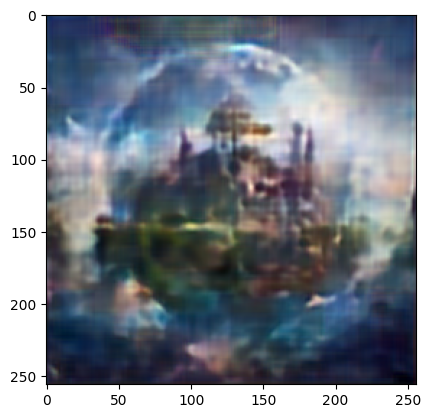

In [4]:
z1 = z_space[0]
z2 = z_space[49]
z3 = z_space[27]

z = z1 - z2 + z3

with torch.no_grad():
    img = model.sample(z).clip(0, 1).squeeze(0).permute(1, 2, 0).cpu().numpy()

plt.imshow(img)

100%|██████████| 100/100 [00:30<00:00,  3.25it/s]


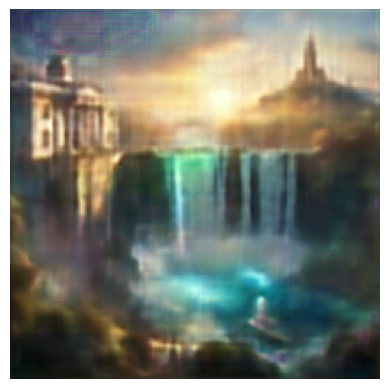

In [41]:
from tqdm import tqdm
from PIL import Image
import os

z1 = z_space[29]
z2 = z_space[52]

os.makedirs('interpolation', exist_ok=True)

with torch.no_grad():
    img3 = model.sample(z1).clip(0, 1).squeeze(0).permute(1, 2, 0).cpu().numpy()

for i in range(50):
    plt.cla()
    plt.imshow(img3)
    plt.axis('off')
    filename = f'interpolation/interp{i}.png'
    plt.savefig(filename, dpi=200, bbox_inches='tight', pad_inches = 0)

for i in tqdm(range(0, 100)):
    c = i / 100
    z3 = (1-c) * z1 + c * z2
    with torch.no_grad():
        img3 = model.sample(z3).clip(0, 1).squeeze(0).permute(1, 2, 0).cpu().numpy()
    plt.cla()
    plt.imshow(img3)
    plt.axis('off')
    filename = f'interpolation/interp{i+50}.png'
    plt.savefig(filename, dpi=200, bbox_inches='tight', pad_inches = 0)

with torch.no_grad():
    img3 = model.sample(z2).clip(0, 1).squeeze(0).permute(1, 2, 0).cpu().numpy()

for i in range(150, 200):
    plt.cla()
    plt.imshow(img3)
    plt.axis('off')
    filename = f'interpolation/interp{i}.png'
    plt.savefig(filename, dpi=200, bbox_inches='tight', pad_inches = 0)

(-0.5, 775.5, 775.5, -0.5)

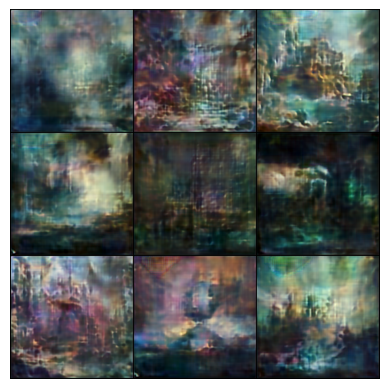

In [43]:
from torchvision.utils import make_grid

imgs = model.sample_with_noise(9, device=device)
imgs = make_grid(imgs, nrow=3).clip(0, 1).permute(1, 2, 0).cpu().numpy()
plt.imshow(imgs)
plt.axis('off')